# 33 MeV D on Ta Experimental Notebook

This experiment ran 33 MeV deuterons on Ta in the vault on 29-31 March, 2017.  The experimental goals were:

1) Measure the input beam for the ETA. <br\>
2) Provide baseline response for each detector in the "native" environment. <br\>

This experiment ran 3 EJ-309 scintillator detectors located at 0, 45, and 90 degrees of the beam. 

This notebook describes all of the steps required to take experimental data, parse that data, perform pulse shape discrimination (PSD) cuts, calibrate the data, and generate a pulse height spectrum (PHS) for unfolding of the 16 MeV on Ta spectrum.  It does not describe the dTOF light yield measurements, analysis, or setup.  
 
The notebook is broken into the following sections: <br\>
1) Experimental Setup <br\>
2) Aquire Calibration Data <br\>
3) Calibration Post-Processing <br\>
4) Perform Calibrations <br\>
5) Experimental Data Acquisition <br\>
6) Pulse Height Spectrum Post-Processing <br\>
7) Spectrum Unfolding <br\>

At the start of each section, all of the modules necessary for that section are imported so that each can be run independently of the rest of the notebook (to the extent that the required inputs from previous sections exist). 

## 1) Experimental Setup

### Initial Setup of DAQ

The DAQ was run in pulse-amplitude mode. A separate waveform data set was also taken, but it is not analyzed here.

### Detector Configuration

The detectors were set up as shown in the figure below (the figure is missing the detector at 45 and has an additional table):

<img src="Pics/CleanBeamSetup.jpg">

The detectors were placed at the following coordinates.  These distances were measured to the face of the detector from the wall for horizontal detectors at 45 and 90, and from the center of the face of the vertical detector at 0 degrees.

EJ-309 (Det0): (81.0,0,0) cm <br\>
EJ-309 (Det45): (73.4,34.7,0) cm <br\>
EJ-309 (Det90): (52.4,91.4,0) cm <br\>

The connections were made as follows (no terminations were made on the output of the detectors):

Detector   | PMT Data Out | Junction Data | Junction HV | HV Ch # | DAQ Ch #  
---------- |:------------:|:-------------:|:-----------:|:-------:|:--------:
Det0       |A1            |30             |50 (HV1)     |0        |0
Det45      |A1            |31             |51 (HV2)     |1        |2
Det90      |A1            |32             |52 (HV3)     |2        |4

### Setting Configuration

#### Set Gain
To determine the neutron (proton) energy to MeVee conversion, lightTables.getLight(neutron_energy,particle) was used from the nsd-rootscripts repo.  For this calibration, the max neutron energy is ~38 MeV. The max Be neutron energy is ~ 11 MeV.  

With S = 1:  <br\>
lightTables.getLight(38,0) = 29.69 <br\>
lightTables.getLight(11,0) = 6.61  <br\>

For the 33 MeV on Ta, the ratio between the max E and the max AmBe neutron E is 4.5, which results in a FSR setting of 440 mV for neutrons, and the 4.4 MeV gamma line would be at 300 mV.  I am going to aim to put the edge of the gamma at 280 mV.  \newline

**NOTE: Both the oscope and PSD must be scaled to ensure that the capture the full scale range (FSR) of the intended experiment.  There are two nobs to do this:**

1) Bias - The higher the bias the better the PSD [affects both] <br/>
2) Charge Sensitivity (on the channels tab) - Reduces the resolution, but allows for a wider FSR [only affects PSD]

#### Determine PSD Settings

After setting the gain the PSD gates and delays were set.  The best settings were determined to be:

Detector | DAQ Ch# | Bias | Charge Sens | Short Gate | Long Gate | Gate Offset | Threshold | BL  | Trigger Holdoff  
---------- |:-------:|:----:|:-----------:|:----------:|:---------:|:-----------:|:---------:|:---:|:---------------:
Det0    |0        |1190V |20           |36          |300        |12           |50        |1024 |300
Det45   |2        |1220V |20           |36          |300        |12           |50        |1024 |300
Det90   |4        |1220V |20           |36          |300        |12           |50        |1024 |300

These are also saved as DppConfig_29Mar17.txt in the 33MeVTa_29-31Feb17 folder on the DAQ and locally.


## 2) Acquire Calibration Data
The targets were calibrated together with one source at a time.  The source was placed on the side of the detectors as shown below:

<img src="Pics/Det0_AmBe.jpg">
<img src="Pics/Det45_AmBe.jpg">

### Calibration #1

Source  | Time (min) | File name          
------- |:----------:|:------------------:
AmBe    |~30 min     |AmBe_001_ls_ch.dat
Co60    |~30 min     |Co60_001_ls_ch.dat
Cs137   |~30 min     |Cs137_001_ls_ch.dat
Bckgrnd |            |Background_001_ls_ch.dat

where ch is the channel number (0, 2, 4).

The files are stored on the DAQ in the 33MeVTa_29-31Mar17/CalibData folder. 

The Src_002_ls_ch.dat series of calibrations was taken under the same conditions for the waveform data.

### Calibration #2 (This can be used to test for gain drift)
A second set of calibration data was taken just after the first run since the gain settings were modified to get better FSR performance. The following settings were used:

Detector | DAQ Ch# | Bias | Charge Sens | Short Gate | Long Gate | Gate Offset | Threshold | BL  | Trigger Holdoff  
---------- |:-------:|:----:|:-----------:|:----------:|:---------:|:-----------:|:---------:|:---:|:---------------:
Det0    |0        |1235V |20           |36          |300        |12           |50        |1024 |300
Det45   |2        |1250V |20           |36          |300        |12           |50        |1024 |300
Det90   |4        |1250V |20           |36          |300        |12           |50        |1024 |300

Source  | Time (min) | File name          
------- |:----------:|:------------------:
AmBe    |~5 min      |AmBe_002_ls_ch.dat
Co60    |~5 min      |Co60_002_ls_ch.dat
Cs137   |~5 min      |Cs137_002_ls_ch.dat
Bckgrnd |            |Background_002_ls_ch.dat

where ch is the channel number (0, 2, 4).

### Calibration #3 (Use this for calibration of data)
A third set of calibration data was taken just after the experimental run since there was a long delay between calibration #2 and experimental data acquisition. These are located in the  33MeVTa_29-31Mar17/CalibData/postRunCalibration folder on the DAQ.  

Source  | Time (min) | File name          
------- |:----------:|:------------------:
AmBe    |~5 min      |AmBe_001_ls_ch.dat
Co60    |~5 min      |Co60_001_ls_ch.dat
Cs137   |~5 min      |Cs137_001_ls_ch.dat
Bckgrnd |            |Background_001_ls_ch.dat

where ch is the channel number (0, 2, 4).

For simplicity, this set was copied to 33MeVTa_29-31Mar17/CalibData/ and renamed as:

Source  | Time (min) | File name          
------- |:----------:|:------------------:
AmBe    |~5 min      |AmBe_003_ls_ch.dat
Co60    |~5 min      |Co60_003_ls_ch.dat
Cs137   |~5 min      |Cs137_003_ls_ch.dat
Bckgrnd |            |Background_003_ls_ch.dat

where ch is the channel number (0, 2, 4).

## 3) Calibration Post-Processing:

The rest of this notebook is both descriptive and interactive.  Choose which step to perform in the notebook, or you can run them in root.  NOTE: If using this notebook as a guide to a different data set, check each of variables and commands to make sure they make sense in the context of your data set.

To use the interactive commands, Root must be installed and PyRoot enabled for this notebook to work. Make sure that $ROOTSYS/lib is in your PYTHONPATH and LD_LIBRARY_PATH variables.

First, load the necessary libraries, set the appropriate environment variables, and compile the C++ support macros from the instructions @ https://bitbucket.org/berkeleylab/nsd-rootscripts/wiki/LibraryCompilation.

Next, The notebook has dependencies on PScripts, which can be cloned from:
https://github.com/jamesbevins/PyScripts

In [1]:
import sys
import os
from ROOT import gROOT

sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Support'))
from Utilities import pause

path = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData/'
os.chdir(path)
print 'Currently working in: \n {}'.format(os.getcwd())

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData


### Convert Binaries to root trees

The following gROOT commands can be copied and run directly in ROOT if preferred.  

Loop over all of the calibration .dat files, convert to .root Trees, and add them to a combined Calibrations.root tree.  

In [5]:
gROOT.ProcessLine('DPPBinaryParser parser;')
gROOT.ProcessLine('vector<string> names;')

for filename in os.listdir(path):
    if filename.endswith(".dat"): 
        name = os.path.splitext(filename)[0]
        print "Processing: ", name
        gROOT.ProcessLine('parser.readDatFile("{0}.dat", "{0}.root");'.format(name))
        gROOT.ProcessLine('names.push_back("{0}.root");'.format(name))
        
gROOT.ProcessLine('DDaqPostProcessing obj;')
gROOT.ProcessLine('obj.makePhCalibs(names,"Calibrations_All.root");')

Processing:  AmBe_003_ls_0
Processing:  Co60_001_ls_0
Processing:  Co60_003_ls_2
Processing:  AmBe_003_ls_2
Processing:  Background_002_ls_4
Processing:  Co60_001_ls_4
Processing:  AmBe_001_ls_4
Processing:  Cs137_003_ls_2
Processing:  Background_001_ls_2
Processing:  Co60_003_ls_0
Processing:  Background_001_ls_4
Processing:  Background_001_ls_0
Processing:  Cs137_002_ls_2
Processing:  Co60_001_ls_2
Processing:  background_003_ls_2
Processing:  Cs137_002_ls_0
Processing:  Cs137_003_ls_0
Processing:  Background_002_ls_0
Processing:  Cs137_002_ls_4
Processing:  AmBe_003_ls_4
Processing:  AmBe_002_ls_4
Processing:  Co60_003_ls_4
Processing:  AmBe_002_ls_2
Processing:  Cs137_001_ls_4
Processing:  AmBe_001_ls_0
Processing:  Co60_002_ls_4
Processing:  Background_002_ls_2
Processing:  Cs137_003_ls_4
Processing:  background_003_ls_0
Processing:  AmBe_001_ls_2
Processing:  Co60_002_ls_0
Processing:  Cs137_001_ls_0
Processing:  Cs137_001_ls_2
Processing:  AmBe_002_ls_0
Processing:  Co60_002_ls_

0L

### Test Gain Drift

This looks at the gain drift across the experiment by using before and after calibrations from one of the sources.

** NOTE: Since the gains changed between calibration set 001 and 002, only 002 and 003 are used. **

In [2]:
detNames = {0: 'Det0', 2: 'Det45', 4: 'Det90'}

In [3]:
driftSrc = 'AmBe'
runNums = ['002', '003']
colorWheel = ['kGreen', 'kBlue']

gROOT.ProcessLine('TFile f("Calibrations_All.root")')
gROOT.ProcessLine('TLine* line = new TLine(0,1,7000,1)')

for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('TCanvas c{}'.format(detNum))
    for run, color in zip(runNums, colorWheel):
        gROOT.ProcessLine('TH1* {0}_{1} = (TH1*) f.Get("{2}_{1}_ls_{3}.root")->Clone()'.format(detName, run, driftSrc, detNum))
        gROOT.ProcessLine('{0}_{1}->Scale(1.0/{0}_{1}->Integral())'.format(detName, run))
        gROOT.ProcessLine('{0}_{1}->Rebin(2)'.format(detName, run))
        gROOT.ProcessLine('{0}_{1}->SetLineColor({2})'.format(detName, run, color))
        gROOT.ProcessLine('{0}_{1}->Draw("same")'.format(detName, run))
        
    gROOT.ProcessLine('TH1* postToPreRatio{0} = (TH1*){0}_{1}->Clone()'.format(detName, runNums[-1]))
    gROOT.ProcessLine('postToPreRatio{0}->Divide({0}_{1})'.format(detName, runNums[-2]))
    gROOT.ProcessLine('TCanvas c{}'.format(detName))
    gROOT.ProcessLine('postToPreRatio{0}->Draw()'.format(detName))
    gROOT.ProcessLine('line->Draw("same")')
    pause()

Press enter to continue
Press enter to continue
Press enter to continue


#### Detector 0 (EJ309)

<img src="Pics/AmBe_PrePostCalibCompDet0.png">
<img src="Pics/AmBe_PrePostCalibRatioDet0.png">

#### Detector 45 (EJ309)

<img src="Pics/AmBe_PrePostCalibCompDet45.png">
<img src="Pics/AmBe_PrePostCalibRatioDet45.png">

#### Detector 90 (EJ309)

<img src="Pics/AmBe_PrePostCalibCompDet90.png">
<img src="Pics/AmBe_PrePostCalibRatioDet90.png">

Det 45 and Det 90 show great stability over ~24 hours.  However, Det0 does not.  It is unclear why this is, but similar behavior is seen with the other sources.  The prerun calibrations (data set 002) doesn't make sense, but it is unclear why.  Maybe different orientation?

### Make PSD cuts on AmBe

To perform the calibration, it is necessary to toss out the neutron data from the AmBe data.  The PSD cut is based on a linear cut of the neutron and gamma bands. 

Each of the gROOT commands can be copied and run directly in ROOT if desired.

In [3]:
# Set file characteristics
runNum = "003"

# Initialize storage        
# Plot each PSD
for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('TFile *AmBe{0} = new TFile("AmBe_{1}_ls_{0}.root","update")'.format(detNum,runNum))
    #gROOT.ProcessLine('eventTree->Draw("(m_amplitude-m_shape)/m_shape:m_shape>>(1250,0,35000,1024,0,1)","","colz")')
    
    gROOT.ProcessLine('TFile *{0} = new TFile("CalibData_{1}.root","recreate")'.format(detName, detNum))
    pause()

Press enter to continue
Press enter to continue
Press enter to continue


This will open a PSD plot.  

Right click and click SetShowProjectY.  This opens a new canvas.  On the original PSD canvas, you can select different projections which are plotted on the right.  use this to find the location of the minima between the neutron and gamma band.  In this case it is ~0.28 for channel 0 (Det0), ~0.3 (Det45) for channel 2, and ~0.29 (Det90) for channel 4.

You can now view those cuts to ensure they are appropriate:

In [4]:
cutPt={0: 0.28, 2: 0.3, 4:0.29}
for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('AmBe{}->cd()'.format(detNum))
    #gROOT.ProcessLine('eventTree->Draw("(m_amplitude-m_shape)/m_shape:m_shape>>(1250,0,35000,1024,0,1)","(m_amplitude-m_shape)/m_amplitude<{}","colz")'.format(cutPt[detNum]))
    pause()

Press enter to continue
Press enter to continue
Press enter to continue


Now we can save the cuts.  This generates a gamma histogram and saves it to the current file.

In [5]:
for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('AmBe{}->cd()'.format(detNum))
    gROOT.ProcessLine('eventTree->Draw("m_amplitude>>AmBeGamma(1250,0,35000)","(m_amplitude-m_shape)/m_shape<{}")'.format(cutPt[detNum]))
    gROOT.ProcessLine('TH1F* AmBeData{0} = (TH1F*) AmBe{0}->Get("AmBeGamma")'.format(detNum))
    gROOT.ProcessLine('AmBe{0}->Write()'.format(detNum))
    pause()
    
    gROOT.ProcessLine('{0}->cd()'.format(detName))
    gROOT.ProcessLine('AmBeData{}->Write()'.format(detNum))
    gROOT.ProcessLine('AmBe{}->Close()'.format(detNum))

Press enter to continue
Press enter to continue
Press enter to continue


### Combine the Calibration Data Files

Next, the experimental claibration files need to be combined into a single TFile for each channel. Only the pre-experimental calibration data set specified above is included.  

This loops over all of the root trees in the directory and combines them by channel number.  It assumes that the standard DAQ naming format is used.  The first prefix assumes that the names of "Co60" and "Cs137" are used for the calibration data of those isotopes.

The background measurements are also rebinned into the same structure for use in background subtraction.

After each data set is read it, the script pauses to allow inspection of the histogram.  The user is prompted to hit <enter> to continue. The histograms are

In [6]:
exclude = ["AmBe", "CalibData"]   #File prefixes for the current calibration run to exclude
tmpName = 'a'
for filename in os.listdir(path):
    name = os.path.splitext(filename)[0]
            
    if filename.endswith(".root") and name.split('_')[1] == runNum \
          and  name.split('_')[0] == "Background":
        print "Adding: ", name
        gROOT.ProcessLine('TFile *{0} = new TFile("{1}.root","update")'.format(tmpName, name))
        gROOT.ProcessLine('eventTree->Draw("m_amplitude>>rebin{0}(1250,0,35000)")'.format(name.split('_')[3]))
        gROOT.ProcessLine('{}->Write()'.format(tmpName)) 
        gROOT.ProcessLine('{}->Close()'.format(tmpName))
        tmpName = chr(ord(tmpName) + 1)
        pause()     
    elif filename.endswith(".root") and name.split('_')[1] == runNum: 
        if name.split('_')[0] not in exclude:
            print "Adding: ", name
            gROOT.ProcessLine('TFile *{0} = new TFile("{1}.root")'.format(tmpName, name))
            gROOT.ProcessLine('eventTree->Draw("m_amplitude>>{0}(1250,0,35000)")'.format(name.split('_')[0]))
            
            gROOT.ProcessLine('TH1F* {0}Data{1} = (TH1F*) {2}->Get("{0}Data")'.format(name.split('_')[0], name.split('_')[3], tmpName))
            gROOT.ProcessLine('{}->cd()'.format(detNames[int(name.split('_')[3])]))
            gROOT.ProcessLine('{}->Write()'.format(name.split('_')[0]))            
            
            gROOT.ProcessLine('{}->Close()'.format(tmpName))
            tmpName = chr(ord(tmpName) + 1)
            pause() 

Adding:  Background_003_ls_4
Press enter to continue
Adding:  Background_003_ls_2
Press enter to continue
Adding:  Cs137_003_ls_2
Press enter to continue
Adding:  Background_003_ls_0
Press enter to continue
Adding:  Co60_003_ls_4
Press enter to continue
Adding:  Co60_003_ls_2
Press enter to continue
Adding:  Cs137_003_ls_0
Press enter to continue
Adding:  Co60_003_ls_0
Press enter to continue
Adding:  Cs137_003_ls_4
Press enter to continue


In [7]:
# Close all of the files
for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('{}->Close()'.format(detName))

### Combine the Calibration Simulation Files

Next, the simulated calibration files need to be combined into a single TFile.  These commands can be run through the python script, but it is probably easier to run from the command line, which is what was done.  

**NOTE: Order matters!  This must be the same order as the data files above.** <br\>
**NOTE: These are run from the cmd line in the directory the files reside, not from within Root.**

#### Commands to run: <br/>
rootcp AmBeDeposition.root:AmBeDeposition CalibSim.root:AmBeSim <br/>
rootcp NaCsCoGammas.root:Cs137 CalibSim.root:Cs137Sim <br/>
rootcp CoDeposition.root:CoDeposition CalibSim.root:Co60Sim <br/>

## 4) Perform Calibrations

Simulation Based Calibrations

Required:  <br/>
1) Vector of pointers to histograms of data  <br/>
2) Vector of pointers to histograms of simulations of that data in the same order  <br/>

To run the calibrations, use the start16MeVTaCalibrations_detNum.cpp script located in the CalibData folder.  

**NOTE: The nsd-rootscripts repo contains an example that is similar but may differ. This script must be loaded first for both methods.**

This script contains user variables that must be modified.  For this mode, two methods are used and require modifications to the script:

1) startGuessSimCalib(): modify the file names <br/>
2) startSimCalibration(): modify the file names and each of the parameters  <br/>

It is recommended to use startGuessSimCalib() first; then use those parameters to use startSimCalibration with background subtraction.  However, if you have starting calibration and scale parameters, startSimCalibration() can be used without startGuessSimCalib(). 

### Detector 0 (ch0)

#### startGuessSimCalib

First load the script and run the method for detector 0:

In [1]:
import os
from ROOT import gROOT

path = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData/'
os.chdir(path)
print 'Currently working in: \n {}'.format(os.getcwd())

gROOT.ProcessLine('.L start33MeVTaCalibration_0.cpp')

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData


0L

Launch the gui:

In [2]:
gROOT.ProcessLine('obj0=startGuessSimCalib()')

121578208L

Set the ranges and the good starting points using the GUI.

Then run the optimization routine in the cell below. 

Repeat the cell below until satified with the fit.

**NOTE: The plots should update.  From there, the ranges can be adjusted as necessary before running the optimization routine again. Ensure that no parameters are pegged to range limits.**

In [6]:
gROOT.ProcessLine('obj0->findGammaCalibrationConstants()')

159658096L

In [9]:
gROOT.ProcessLine('obj0->writeStateToDisk("CalibParams_0.txt")')

0L

The fit obtained was:

<img src="Pics/33MeVTa_Det0InitCalib.png">

#### startSimCalib

Perform a more thorough calibration using the parameters found from above (copy them from the calib_params file into the startSimCalib function).  A power law fit is used for the background subtraction.

In [1]:
import os
from ROOT import gROOT

path = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData/'
os.chdir(path)
print 'Currently working in: \n {}'.format(os.getcwd())

gROOT.ProcessLine('.L start33MeVTaCalibration_0.cpp')

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData


0L

In [2]:
gROOT.ProcessLine('sim0=startSimCalibration()')

117036368L

In [15]:
gROOT.ProcessLine('sim0->findGammaCalibrationConstants()')

705950624L

In [16]:
gROOT.ProcessLine('std::vector<double> params0 = sim0->findGammaCalibrationConstants()')
gROOT.ProcessLine('sim0->writeStateToDisk("CalibParams_0.txt")')

0L

In [17]:
gROOT.ProcessLine('sim0->getMinimizer()->Hesse()')

1L

The calibration is saved as **CalibParams_0.txt**.  The fit obtained was:

<img src="Pics/33MeVTa_Det0FinalCalib.png">

##### The minimization results (Det0):

EIGENVALUES OF SECOND-DERIVATIVE MATRIX: <br\>
9.3806e-05  9.7271e-03  3.6317e-02  1.9474e-01  2.1647e-01  3.2337e-01  3.8180e-01  6.6398e-01  8.4285e-01  9.2820e-01  9.9739e-01  1.0290e+00  1.2964e+00  1.7833e+00  2.3381e+00  2.7867e+00  3.1716e+00

 COVARIANCE MATRIX CALCULATED SUCCESSFULLY <br\>
 FCN=1031.37 FROM HESSE     STATUS=OK            251 CALLS         252 TOTAL  <br\>
                     EDM=13.5854    STRATEGY= 1      ERROR MATRIX ACCURATE  <br\>
  EXT PARAMETER                                INTERNAL      INTERNAL   <br\>
  NO.   NAME      VALUE            ERROR       STEP SIZE       VALUE    <br\>
   1  a            1.00558e-03   6.35035e-07   2.28730e-04  -1.72940e-03 <br\>
   2  b            3.36577e-02   2.62736e-04   4.34693e-03   1.03794e-01 <br\>
   3  Ec           1.60420e-01   2.00196e-03   7.79597e-03   1.27696e-01 <br\>
   4  E1           5.00000e-02   2.60672e-03   8.29164e-02  -1.57010e+00 <br\>
                                 WARNING -   - ABOVE PARAMETER IS AT LIMIT. <br\>
   5  E2           1.51149e-01   1.53469e-03   1.04398e-02   8.15661e-01 <br\>
   
 EXTERNAL ERROR MATRIX.    NDIM=  25    NPAR= 17    ERR DEF=1 <br\>
 ELEMENTS ABOVE DIAGONAL ARE NOT PRINTED. <br\>
  4.033e-13 -1.143e-10 -5.170e-10  2.326e-13  4.680e-10 <br\>
 -1.143e-10  6.904e-08  1.225e-07 -6.650e-11 -3.171e-08 <br\>
 -5.170e-10  1.225e-07  4.009e-06 -2.141e-09 -1.491e-06 <br\>
  2.326e-13 -6.650e-11 -2.141e-09  4.321e-10 -3.217e-09  <br\>
  4.680e-10 -3.171e-08 -1.491e-06 -3.217e-09  2.356e-06  <br\>

 PARAMETER  CORRELATION COEFFICIENTS   <br\>
       NO.  GLOBAL      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16 <br\>
        1  0.94382   1.000 -0.685 -0.407  0.018  0.480  0.649  0.029  0.073 -0.883  0.882 -0.533  0.017  0.108  0.011  0.110  0.208 <br\>
        2  0.80298  -0.685  1.000  0.233 -0.012 -0.079 -0.405  0.234  0.026  0.554 -0.553  0.334 -0.039 -0.056  0.030 -0.081 -0.119 <br\>
        3  0.80290  -0.407  0.233  1.000 -0.051 -0.485 -0.165 -0.020  0.076  0.641 -0.649  0.399 -0.001 -0.041 -0.013 -0.165 -0.179 <br\>
        4  0.20496   0.018 -0.012 -0.051  1.000 -0.101  0.012  0.009  0.014 -0.017  0.017 -0.010 -0.009 -0.008  0.008 -0.011 -0.006 <br\>
        5  0.75659   0.480 -0.079 -0.485 -0.101  1.000  0.301  0.368  0.082 -0.535  0.536 -0.326 -0.288 -0.164  0.267  0.035  0.097 <br\>
        6  0.89265   0.649 -0.405 -0.165  0.012  0.301  1.000  0.041  0.067 -0.624  0.609 -0.357  0.007  0.070  0.011  0.056  0.125 <br\>
        7  0.85925   0.029  0.234 -0.020  0.009  0.368  0.041  1.000  0.062 -0.043  0.042 -0.026 -0.555 -0.328  0.525 -0.027 -0.004 <br\>
        8  0.86280   0.073  0.026  0.076  0.014  0.082  0.067  0.062  1.000 -0.034  0.032 -0.019 -0.028 -0.009  0.028 -0.734 -0.420 <br\>
        9  0.99991  -0.883  0.554  0.641 -0.017 -0.535 -0.624 -0.043 -0.034  1.000 -1.000  0.610 -0.014 -0.098 -0.012 -0.138 -0.217 <br\>
       10  0.99991   0.882 -0.553 -0.649  0.017  0.536  0.609  0.042  0.032 -1.000  1.000 -0.612  0.014  0.098  0.012  0.139  0.218 <br\>
       11  0.61336  -0.533  0.334  0.399 -0.010 -0.326 -0.357 -0.026 -0.019  0.610 -0.612  1.000 -0.008 -0.059 -0.007 -0.085 -0.132 <br\>
       12  0.99185   0.017 -0.039 -0.001 -0.009 -0.288  0.007 -0.555 -0.028 -0.014  0.014 -0.008  1.000  0.944 -0.971  0.031  0.025 <br\>
       13  0.97853   0.108 -0.056 -0.041 -0.008 -0.164  0.070 -0.328 -0.009 -0.098  0.098 -0.059  0.944  1.000 -0.908  0.034  0.041 <br\>
       14  0.97406   0.011  0.030 -0.013  0.008  0.267  0.011  0.525  0.028 -0.012  0.012 -0.007 -0.971 -0.908  1.000 -0.024 -0.016 <br\>
       15  0.96612   0.110 -0.081 -0.165 -0.011  0.035  0.056 -0.027 -0.734 -0.138  0.139 -0.085  0.031  0.034 -0.024  1.000  0.863 <br\>
       16  0.92849   0.208 -0.119 -0.179 -0.006  0.097  0.125 -0.004 -0.420 -0.217  0.218 -0.132  0.025  0.041 -0.016  0.863  1.000 <br\>
       17  0.91854  -0.090  0.061  0.115  0.007 -0.032 -0.048  0.015  0.493  0.106 -0.106  0.065 -0.021 -0.025  0.016 -0.878 -0.879 <br\>

In [18]:
# Plot Resolution function
gROOT.ProcessLine('TF1* resolution = sim0->getResolutionFunction()')
gROOT.ProcessLine('TCanvas c2')
gROOT.ProcessLine('resolution->Draw()')

0L

#### Resolution Function
<img src="Pics/ResolutionFunct_Det0.png">

#### Resolution Function From Literature
<img src="Pics/LitEJ309ResolutionFunct.png">

### Detector 45 (Ch2)
#### startSimCalib

Perform a more thorough calibration using the parameters found from above (copy them from the calib_params file into the startSimCalib function).  A power law fit is used for the background subtraction.

In [1]:
import os
from ROOT import gROOT

path = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData/'
os.chdir(path)
print 'Currently working in: \n {}'.format(os.getcwd())

gROOT.ProcessLine('.L start33MeVTaCalibration_45.cpp')

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData


0L

In [2]:
gROOT.ProcessLine('sim0=startSimCalibration()')

101036864L

In [23]:
gROOT.ProcessLine('sim0->findGammaCalibrationConstants()')

107781200L

In [24]:
gROOT.ProcessLine('std::vector<double> params0 = sim0->findGammaCalibrationConstants()')
gROOT.ProcessLine('sim0->writeStateToDisk("CalibParams_2.txt")')

0L

In [25]:
gROOT.ProcessLine('sim0->getMinimizer()->Hesse()')

1L

The calibration is saved as **CalibParams_2.txt**.  The fit obtained was:

<img src="Pics/33MeVTa_Det45FinalCalib.png">

##### The minimization results (Det45):

 EIGENVALUES OF SECOND-DERIVATIVE MATRIX: <br\>
-2.5809e+02  4.3164e-01  7.2905e-01  8.0125e-01  9.1741e-01  9.3912e-01  9.4229e-01  9.9491e-01  9.9775e-01  1.0000e+00  1.0000e+00  1.0027e+00  1.0049e+00  1.0572e+00  1.2470e+00  1.6060e+00  2.6042e+02 <br\>
 FCN=2007.51 FROM HESSE     STATUS=NOT POSDEF    249 CALLS         250 TOTAL <br\>
                     EDM=9.25554e+06    STRATEGY= 1      ERR MATRIX NOT POS-DEF <br\>
  EXT PARAMETER                APPROXIMATE     INTERNAL      INTERNAL   <br\>
  NO.   NAME      VALUE            ERROR       STEP SIZE       VALUE    <br\>
   1  a            1.17689e-03   1.71843e-07   2.39372e-04   3.45520e-01 <br\>
   2  b            3.19963e-02   2.33971e-02   5.22846e-05  -2.29474e-04 <br\>
   3  Ec           1.22023e-01   7.49948e-06   1.08847e-02  -2.54454e-01 <br\>
   4  E1           9.75827e-02   1.00534e-05   1.65469e-02  -3.74239e-01 <br\>
   5  E2           1.52449e-01   7.06010e-05   3.28449e-03   1.08105e-01 <br\>
   
 EXTERNAL ERROR MATRIX.    NDIM=  25    NPAR= 17    ERR DEF=1 <br\>
 ELEMENTS ABOVE DIAGONAL ARE NOT PRINTED. <br\>
  2.953e-14 -5.382e-09 -4.518e-13 -1.009e-12 -1.194e-11 <br\>
 -5.382e-09  9.841e-04  8.261e-08  1.845e-07  2.184e-06  <br\>
 -4.518e-13  8.261e-08  5.624e-11  1.548e-11  1.833e-10 <br\>
 -1.009e-12  1.845e-07  1.548e-11  1.011e-10  4.092e-10 <br\>
 -1.194e-11  2.184e-06  1.833e-10  4.092e-10  4.984e-09  <br\>
ERR MATRIX NOT POS-DEF  <br\>

 PARAMETER  CORRELATION COEFFICIENTS   <br\>
       NO.  GLOBAL      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16 <br\>
        1  0.99835   1.000 -0.998 -0.351 -0.584 -0.984 -0.498 -0.995 -0.524 -0.149 -0.305  0.000 -0.964  0.882 -0.002 -0.253 -0.092 <br\>
        2  0.99900  -0.998  1.000  0.351  0.585  0.986  0.499  0.996  0.525  0.149  0.306 -0.000  0.966 -0.883  0.002  0.254  0.092 <br\>
        3  0.35116  -0.351  0.351  1.000  0.205  0.346  0.175  0.350  0.184  0.052  0.107 -0.000  0.339 -0.310  0.001  0.089  0.032 <br\>
        4  0.58484  -0.584  0.585  0.205  1.000  0.577  0.292  0.583  0.307  0.087  0.179 -0.000  0.565 -0.517  0.001  0.148  0.054 <br\>
        5  0.98587  -0.984  0.986  0.346  0.577  1.000  0.492  0.982  0.517  0.147  0.301 -0.000  0.952 -0.871  0.002  0.250  0.091 <br\>
        6  0.49882  -0.498  0.499  0.175  0.292  0.492  1.000  0.497  0.262  0.074  0.152 -0.000  0.482 -0.441  0.001  0.127  0.046 <br\>
        7  0.99649  -0.995  0.996  0.350  0.583  0.982  0.497  1.000  0.523  0.149  0.305 -0.000  0.962 -0.880  0.002  0.253  0.092 <br\>
        8  0.52454  -0.524  0.525  0.184  0.307  0.517  0.262  0.523  1.000  0.078  0.160 -0.000  0.507 -0.463  0.001  0.133  0.048 <br\>
        9  0.14903  -0.149  0.149  0.052  0.087  0.147  0.074  0.149  0.078  1.000  0.045 -0.000  0.144 -0.132  0.000  0.038  0.014 <br\>
       10  0.30572  -0.305  0.306  0.107  0.179  0.301  0.152  0.305  0.160  0.045  1.000 -0.000  0.295 -0.270  0.000  0.078  0.028 <br\>
       11  0.00020   0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000  1.000 -0.000  0.000 -0.000 -0.000 -0.000 <br\>
       12  0.96584  -0.964  0.966  0.339  0.565  0.952  0.482  0.962  0.507  0.144  0.295 -0.000  1.000 -0.853  0.002  0.245  0.089 <br\>
       13  0.88349   0.882 -0.883 -0.310 -0.517 -0.871 -0.441 -0.880 -0.463 -0.132 -0.270  0.000 -0.853  1.000 -0.001 -0.224 -0.082 <br\>
       14  0.00156  -0.002  0.002  0.001  0.001  0.002  0.001  0.002  0.001  0.000  0.000 -0.000  0.002 -0.001  1.000  0.000  0.000 <br\>
       15  0.25386  -0.253  0.254  0.089  0.148  0.250  0.127  0.253  0.133  0.038  0.078 -0.000  0.245 -0.224  0.000  1.000  0.023 <br\>
       16  0.09238  -0.092  0.092  0.032  0.054  0.091  0.046  0.092  0.048  0.014  0.028 -0.000  0.089 -0.082  0.000  0.023  1.000 <br\>
       17  0.01553  -0.016  0.016  0.005  0.009  0.015  0.008  0.015  0.008  0.002  0.005 -0.000  0.015 -0.014  0.000  0.004  0.001 <br\>

In [26]:
# Plot Resolution function
gROOT.ProcessLine('TF1* resolution = sim0->getResolutionFunction()')
gROOT.ProcessLine('TCanvas c2')
gROOT.ProcessLine('resolution->Draw()')

0L

#### Resolution Function
<img src="Pics/ResolutionFunct_Det45.png">

#### Resolution Function From Literature
<img src="Pics/LitEJ309ResolutionFunct.png">

### Detector 90 (Ch4)
#### startSimCalib

Perform a more thorough calibration using the parameters found from above (copy them from the calib_params file into the startSimCalib function).  A power law fit is used for the background subtraction.

In [7]:
import os
from ROOT import gROOT

path = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData/'
os.chdir(path)
print 'Currently working in: \n {}'.format(os.getcwd())

gROOT.ProcessLine('.L start33MeVTaCalibration_90.cpp')

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData


0L

In [8]:
gROOT.ProcessLine('sim0=startSimCalibration()')

120845008L

In [13]:
gROOT.ProcessLine('sim0->findGammaCalibrationConstants()')

123357472L

In [14]:
gROOT.ProcessLine('std::vector<double> params0 = sim0->findGammaCalibrationConstants()')
gROOT.ProcessLine('sim0->writeStateToDisk("CalibParams_4.txt")')

0L

In [15]:
gROOT.ProcessLine('sim0->getMinimizer()->Hesse()')

1L

The calibration is saved as **CalibParams_4.txt**.  The fit obtained was:

<img src="Pics/33MeVTa_Det90FinalCalib.png">

##### The minimization results (Det90):

 EIGENVALUES OF SECOND-DERIVATIVE MATRIX: <br\>
        -1.5225e-01  7.3387e-04  3.3268e-02  5.8975e-02  9.5601e-02  3.4520e-01  3.7284e-01  5.2547e-01  7.7016e-01  9.9462e-01  9.9542e-01  1.1758e+00  1.4002e+00  1.8223e+00  2.1730e+00  2.5915e+00  3.7971e+00 <br\>
 FCN=2418.41 FROM HESSE     STATUS=NOT POSDEF    247 CALLS         248 TOTAL <br\>
                     EDM=138.578    STRATEGY= 1      ERR MATRIX NOT POS-DEF <br\>
  EXT PARAMETER                APPROXIMATE     INTERNAL      INTERNAL  <br\> 
  NO.   NAME      VALUE            ERROR       STEP SIZE       VALUE   <br\> 
   1  a            1.04706e-03   2.24692e-07   2.19212e-04   8.07836e-02 <br\>
   2  b            3.33962e-02   1.33382e-04   4.22420e-03   8.73705e-02 <br\>
   3  Ec           1.17010e-01   1.25941e-03   1.26882e-02  -4.64887e-01 <br\>
   4  E1           1.20893e-01   2.21046e-03   7.14901e-03  -6.18203e-01 <br\>
   5  E2           1.38368e-01   1.08538e-03   1.37168e-02   9.34005e-01 <br\>
   
 EXTERNAL ERROR MATRIX.    NDIM=  25    NPAR= 17    ERR DEF=1
  5.049e-14 -1.854e-11  8.917e-11  3.237e-11  5.745e-12 <br\>
 -1.854e-11  1.779e-08 -3.362e-08 -6.442e-09  4.121e-08 <br\>
  8.917e-11 -3.362e-08  1.586e-06 -8.979e-07  8.388e-08 <br\>
  3.237e-11 -6.442e-09 -8.979e-07  4.887e-06 -1.594e-06 <br\>
  5.745e-12  4.121e-08  8.388e-08 -1.594e-06  1.178e-06 <br\> 

 PARAMETER  CORRELATION COEFFICIENTS   <br\>
       NO.  GLOBAL      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16 <br\>
        1  0.78787   1.000 -0.618  0.315  0.065  0.024  0.167 -0.080  0.065  0.004  0.031  0.002  0.044 -0.066 -0.046 -0.013  0.054 <br\>
        2  0.79306  -0.618  1.000 -0.200 -0.022  0.285 -0.085  0.304  0.018 -0.001 -0.016 -0.001 -0.013  0.033  0.012 -0.002 -0.011 <br\>
        3  0.61076   0.315 -0.200  1.000 -0.322  0.061  0.215 -0.039  0.035 -0.149 -0.009  0.010 -0.046  0.019  0.046 -0.029  0.003 <br\>
        4  0.84430   0.065 -0.022 -0.322  1.000 -0.664  0.019  0.073  0.033 -0.010  0.001  0.001  0.146 -0.090 -0.152 -0.045 -0.022 <br\>
        5  0.84633   0.024  0.285  0.061 -0.664  1.000 -0.026  0.121  0.015  0.039  0.007 -0.002  0.129 -0.077 -0.138  0.017  0.025 <br\>
        6  0.65778   0.167 -0.085  0.215  0.019 -0.026  1.000 -0.002  0.018 -0.401 -0.000  0.024  0.009 -0.011 -0.010 -0.011  0.005 <br\>
        7  0.39669  -0.080  0.304 -0.039  0.073  0.121 -0.002  1.000  0.022 -0.003 -0.002  0.000  0.152 -0.078 -0.165 -0.009  0.001 <br\>
        8  0.67577   0.065  0.018  0.035  0.033  0.015  0.018  0.022  1.000 -0.005  0.002  0.000  0.013 -0.010 -0.014 -0.540  0.033 <br\>
        9  0.88075   0.004 -0.001 -0.149 -0.010  0.039 -0.401 -0.003 -0.005  1.000 -0.769 -0.028 -0.002  0.000  0.002  0.008  0.005 <br\>
       10  0.85332   0.031 -0.016 -0.009  0.001  0.007 -0.000 -0.002  0.002 -0.769  1.000 -0.016  0.001 -0.002 -0.001  0.001  0.002 <br\>
       11  0.07008   0.002 -0.001  0.010  0.001 -0.002  0.024  0.000  0.000 -0.028 -0.016  1.000  0.000 -0.000 -0.000 -0.001 -0.000 <br\>
       12  0.99666   0.044 -0.013 -0.046  0.146  0.129  0.009  0.152  0.013 -0.002  0.001  0.000  1.000 -0.577 -0.996 -0.017 -0.007 <br\>
       13  0.58256  -0.066  0.033  0.019 -0.090 -0.077 -0.011 -0.078 -0.010  0.000 -0.002 -0.000 -0.577  1.000  0.580  0.010  0.002 <br\>
       14  0.99676  -0.046  0.012  0.046 -0.152 -0.138 -0.010 -0.165 -0.014  0.002 -0.001 -0.000 -0.996  0.580  1.000  0.018  0.007 <br\>
       15  0.81604  -0.013 -0.002 -0.029 -0.045  0.017 -0.011 -0.009 -0.540  0.008  0.001 -0.001 -0.017  0.010  0.018  1.000  0.541 <br\>
       16  0.71760   0.054 -0.011  0.003 -0.022  0.025  0.005  0.001  0.033  0.005  0.002 -0.000 -0.007  0.002  0.007  0.541  1.000 <br\>
       17  0.70675  -0.002 -0.001  0.003  0.007 -0.005  0.001  0.000  0.107 -0.001 -0.000  0.000  0.002 -0.001 -0.003 -0.599 -0.626 <br\> 

In [16]:
# Plot Resolution function
gROOT.ProcessLine('TF1* resolution = sim0->getResolutionFunction()')
gROOT.ProcessLine('TCanvas c2')
gROOT.ProcessLine('resolution->Draw()')

0L

#### Resolution Function
<img src="Pics/ResolutionFunct_Det90.png">

#### Resolution Function From Literature
<img src="Pics/LitEJ309ResolutionFunct.png">

## 5) Experimental Data Acquisition:



### Run #001
**This was with an unstable beam. Only use for up purposes.**

All current monitor data is stored in: **2H+1_33MeV_0216_31Mar2017_Goldblum at 50 nA.bcm** in the 33MeVTa_29-31Mar17/BCM. 

The current was ~50 nA. The current integrator was set to the 2E-7 Scale.

Start: 0216
Current integrator reading is 0 <br\>
Stop: 0243 <br\>
Current integrator reading is 595 <br\>

### Run #002
All current monitor data is stored in: **2H+1_33MeV_1027_31Mar2017_Goldblum at 100 nA no bias.bcm** in the 33MeVTa_29-31Mar17/BCM. 

The current was ~100 nA. The current integrator was set to the 2E-7 Scale.

Start: 1028
Current integrator reading is 0 <br\>
Stop: 1044 <br\>
Current integrator reading is 575 <br\>

## 6) Pulse Height Spectrum Post-Processing:

These steps convert the experimental data to root files, makes a TChain combining the run data, applys PSD cuts, and generates a heprow formatted .phs file for use in unfolding.  

In [1]:
import sys
import os
from ROOT import gROOT

sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Support'))
sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Unfolding'))
from Utilities import pause
from Root import CalibParams
calPath = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData/'

path = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/BeamOnly/'
os.chdir(path)
print 'Currently working in: \n {}'.format(os.getcwd())

detNames = {0: 'Det0', 2: 'Det45', 4: 'Det90'}
runNum = '002'
calNames = {0: 'CalibParams_0.txt', 2: 'CalibParams_2.txt', 4: 'CalibParams_4.txt'}

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/BeamOnly


### Convert Data Files from Binary to Root

Since the 3rd input to the parser is set to true, this also cuts all flagged pile-up events.

In [2]:
gROOT.ProcessLine('DPPBinaryParser parser;')

for filename in os.listdir(path):
    if filename.endswith(".dat"): 
        name = os.path.splitext(filename)[0]
        print 'Processing: ', filename
        gROOT.ProcessLine('parser.readDatFile("{0}.dat", "{0}.root", true);'.format(name))

Processing:  33MeVTa_002_ls_4.dat
Processing:  33MeVTa_001_ls_0.dat
Processing:  33MeVTa_002_ls_2.dat
Processing:  33MeVTa_001_ls_2.dat
Processing:  33MeVTa_002_ls_0.dat
Processing:  33MeVTa_001_ls_4.dat


### Make PSD Cuts

To perform the unfolding, it is necessary to toss out the gamma data from the target data.   A PSD cut based on a gaussian fitting of the neutron and gamma bands is used. 

#### Gaussian fitted PSD cuts:

This cannot be run interactively since the software requires user inputs in the terminal and is a little finicky.  The process is described instead.  All statements following >>> are intended to be typed in a root terminal session in the folder with the root files. Each step lists the values used for each channel in the format (ch 0, ch1, ..., ch N)

Next, create the necessary object and start the fit for the calibration set of interest:

\>>>obj=DDaqPostProcessing("33MeVTa_002_ls_0.root") <br\>
\>>>obj.developFittedPSDCut()

This will open a PSD plot and ask for a linear PSD cut. Determine what linear cut works at high PH and enter it.  **(0.205) used for this analysis**

It then asks for a PH above where mixing occurs.  Chose a PH channel where there is clearly no mixing.  **(3000) used for this analysis**

Next, enter a start bin # where there is PH data.  This is bin #, not channel #.  **(40) used for this analysis**

Finally enter a stop bin number where the fitting will stop.  This is bin #, not channel #.  **(400) used for this analysis**

This spawns a fitting window for the two distributions.  If the fit is good, hit update, close, and type a letter into the terminal to continue.  If the fit is bad, manually adjust the parameters until a decent fit is obtained and hit fit.  Then update, close, and type a letter in the terminal. 

Now the spectra can be saved with:

\>>>obj.makeDualPhSpectra("33MeVTa_002_ls_0_fittedPSDCut.root", true)

The next cell takes that data and populates it into a root tree for calibration.

### Apply Calibrations

params.a is the slope of the calibration <br\>
params.b is the intercept of the calibration

In [2]:
detNames = {0: 'Det0'}  ###REMOVE WHEN YOU GET ACTUAL PSD CUTS ON THEM ALL!

gROOT.ProcessLine('HistogramOperations ops')
gROOT.ProcessLine('lightTables.setBirksParams(1.0,6.90)')

for detNum, detName in detNames.iteritems():
    params = CalibParams(calPath+calNames[detNum])
    gROOT.ProcessLine('vector<TH1*> phs{1} = ops.loadHistograms("33MeVTa_{0}_ls_{1}_fittedPSDCut.root")'.format(runNum,detNum))
    gROOT.ProcessLine('ops.applyCalibration(phs{0}[1],{1},{2})'.format(detNum, params.a, params.b))
    gROOT.ProcessLine('TFile *tgt{0} = new TFile("33MeVTa_{0}_ls_{1}_calibFittedPSDCut.root","recreate")'.format(runNum,detNum))
    gROOT.ProcessLine('phs{0}[1]->Rebin(3)'.format(detNum))
    gROOT.ProcessLine('phs{0}[1]->Draw()'.format(detNum))    
    gROOT.ProcessLine('phs{0}[1]->Write()'.format(str(detNum)))
    pause()

TH1D::Rebin:0: RuntimeWarning: ngroup=3 is not an exact divider of nbins=5000.


Press enter to continue


<img src="Pics/CalibPHS_Det0.png">

### Generate the HEPROW .phs file

Find the first bin with non tuncated data.  Due the nonlinear threshold at low PH, the low PH bins will be truncated and should not be used.  This is best done visually with the plot generated immediately above in combination with the full PSD plot.  The following commands can be usedful for finding the lower bin edge for the peak bin (the values in the commands are the ones used for further analysis):

\>>>TFile f("33MeVTa_002_ls_0_calibFittedPSDCut.root") <br\>
\>>>PHNeuWithCut_0->GetBinContent(5) <br\>
\>>>PHNeuWithCut_0->GetXaxis()->GetBinLowEdge(5) <br\>

If necessary, choose a rebin number to get the desired MeVee/bin.  In this case, the rebinning to get ~ 0.01 MeVee/bin was done above.  

Rebin to stastically significant bins and print .phs file.

In [3]:
rebin = 0
truncate = {0: 3.365770e-02}#, 1: 2.729744e-01}
outPath = "/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/Unfold/BeamOnly/HEPROW/Inputs/"

gROOT.ProcessLine('HistogramWriter writer;')

for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('PulseHeightSpectrum{0} = (TH1D*)ops.truncateHist(phs{0}[1],{1},30)'.format(detNum, truncate[detNum]))
    gROOT.ProcessLine('PulseHeightSpectrum{0}->Rebin({1})'.format(detNum, rebin))
    gROOT.ProcessLine('TH1* dataHist{0} = ops.rebinStatistically(PulseHeightSpectrum{0},100);'.format(detNum))
    gROOT.ProcessLine('writer.PhToHEPROW(PulseHeightSpectrum{0},"{1}{2}_phs_03")'.format(detNum, outPath, detName))
    gROOT.ProcessLine('writer.PhToHEPROW(dataHist{0},"{1}{2}_stat_100_phs_03")'.format(detNum, outPath, detName))

## 7) Spectrum Unfolding

From here forward, the rest of the notebook is on a detector by detector basis.

### Generate 1 MeV EJ309 Response Matrix

A unique smeare matrix is generated for each detector

In [1]:
import os
import sys
from ROOT import gROOT
import numpy as np

sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Support'))
sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Unfolding'))
from Utilities import pause
from Root import CalibParams

outPath = "/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/Unfold/BeamOnly/HEPROW/Inputs/"
rspPath= '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/PHS/ResponseMatrices/simSideResponse20Mil.root'
calPath = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData/'

os.chdir(outPath)
print 'Currently working in: \n {}'.format(os.getcwd())

detNames = {0: 'Det0'}#, 2: 'Det45', 4: 'Det90'}
calNames = {0: 'CalibParams_0.txt'}#, 2: 'CalibParams_2.txt', 4: 'CalibParams_4.txt'}

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/Unfold/BeamOnly/HEPROW/Inputs


#### Response Matrix Binning

rspEwidth = the width of bins to use for the binning of the response matrix energy <br/>
rspEmin = the minimum Energy to use for the binning of the response matrix  <br/>
rspEmax = the maximum Energy to use for the binning of the response matrix  <br/>
rspLwidth = the width of bins to use for the binning of the response matrix light <br/>
rspLmin = the minimum Light to use for the binning of the response matrix  <br/>
rspLmax = the maximum Light to use for the binning of the response matrix  <br/>

In [2]:
rspEwidth=1
rspEmin=0
rspEmax=40
rspLwidth=0.03
rspLmin=0.0
rspLmax=40.0

#### Create the bin structures, normalize and smear the response matrix, and print .rsp file

In [3]:
# Initialize objects
gROOT.ProcessLine('SimulationManipulation sm("{}",0)'.format(rspPath))
gROOT.ProcessLine('HistogramOperations ops')
gROOT.ProcessLine('HistogramWriter writer;')
gROOT.ProcessLine('lightTables.setBirksParams(1.0,6.90)')

# Create the bin structures
rspEbins=np.arange(rspEmin,rspEmax,rspEwidth)
rspEbins=np.append(rspEbins,rspEmax)
#print rspEbins
rspLbins=np.arange(rspLmin,rspLmax,rspLwidth)
rspLbins=np.append(rspLbins,rspLmax)
#print rspLbins
gROOT.ProcessLine('const Int_t EBINS = {}; const Int_t LBINS = {};'.format(len(rspEbins)-1,len(rspLbins)-1))
gROOT.ProcessLine('Double_t eEdges[EBINS + 1] = {}{}{};'.format("{",", ".join(str(e) for e in rspEbins),"}"))
gROOT.ProcessLine('Double_t lEdges[LBINS + 1] = {}{}{};'.format("{",", ".join(str(e) for e in rspLbins),"}"))
gROOT.ProcessLine('axis1 = TAxis(EBINS,eEdges);')
gROOT.ProcessLine('axis2 = TAxis(LBINS,lEdges);')

# Create the Histogram and output file
#gROOT.ProcessLine('TH2* matrix1=sm.getNormalizedResponseMatrix(axis1,axis2,1)')
gROOT.ProcessLine('TH2* matrix1=sm.getNormalizedResponseMatrix(axis1,axis2)')
gROOT.ProcessLine('writer.ResponseToHEPROW(matrix1,"EJ309_resp_03_1")')

# Smear the Response Matrix and Create the .rsp File
for detNum, detName in detNames.iteritems():   
    params = CalibParams(calPath+calNames[detNum])

    gROOT.ProcessLine('TH2* smearMatrix{0} = ops.skewedGausSmearMatrix(matrix1, {1}, {2}, {3})'.format(detNum, params.alpha, params.beta, params.gamma))
    gROOT.ProcessLine('smearMatrix{0}->Draw("colz")'.format(detNum))
    gROOT.ProcessLine('writer.ResponseToHEPROW(smearMatrix{0},"{1}_smearedResp_03_1")'.format(detNum,detName))
    
    pause()

Press enter to continue


#### Det0:
<img src="Pics/1MeVSmearedResp_Det0.png">

### Generate 0.5 MeV EJ309 Response Matrix

#### Load the simulated respose matrix

The kernel must be restarted for this section to work.

In [1]:
import os
import sys
from ROOT import gROOT
import numpy as np

sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Support'))
sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Unfolding'))
from Utilities import pause
from Root import CalibParams

outPath = "/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/Unfold/BeamOnly/HEPROW/Inputs/"
rspPath= '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/PHS/ResponseMatrices/simSideResponse20Mil.root'
calPath = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/CalibData/'

os.chdir(outPath)
print 'Currently working in: \n {}'.format(os.getcwd())

detNames = {0: 'Det0'}#, 2: 'Det45', 4: 'Det90'}
calNames = {0: 'CalibParams_0.txt'}#, 2: 'CalibParams_2.txt', 4: 'CalibParams_4.txt'}

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/Unfold/BeamOnly/HEPROW/Inputs


#### Response Matrix Binning

rspEwidth = the width of bins to use for the binning of the response matrix energy <br/>
rspEmin = the minimum Energy to use for the binning of the response matrix  <br/>
rspEmax = the maximum Energy to use for the binning of the response matrix  <br/>
rspLwidth = the width of bins to use for the binning of the response matrix light <br/>
rspLmin = the minimum Light to use for the binning of the response matrix  <br/>
rspLmax = the maximum Light to use for the binning of the response matrix  <br/>

In [2]:
rspEwidth=0.5
rspEmin=0
rspEmax=40
rspLwidth=0.03
rspLmin=0.0
rspLmax=40.0

#### Create the bin structures, normalize and smear the response matrix, and print .rsp file

In [3]:
# Initialize objects
gROOT.ProcessLine('SimulationManipulation sm("{}",0)'.format(rspPath))
gROOT.ProcessLine('HistogramOperations ops')
gROOT.ProcessLine('HistogramWriter writer;')
gROOT.ProcessLine('lightTables.setBirksParams(1.0,6.90)')

# Create the bin structures
rspEbins=np.arange(rspEmin,rspEmax,rspEwidth)
rspEbins=np.append(rspEbins,rspEmax)
#print rspEbins
rspLbins=np.arange(rspLmin,rspLmax,rspLwidth)
rspLbins=np.append(rspLbins,rspLmax)
#print rspLbins
gROOT.ProcessLine('const Int_t EBINS = {}; const Int_t LBINS = {};'.format(len(rspEbins)-1,len(rspLbins)-1))
gROOT.ProcessLine('Double_t eEdges[EBINS + 1] = {}{}{};'.format("{",", ".join(str(e) for e in rspEbins),"}"))
gROOT.ProcessLine('Double_t lEdges[LBINS + 1] = {}{}{};'.format("{",", ".join(str(e) for e in rspLbins),"}"))
gROOT.ProcessLine('axis1 = TAxis(EBINS,eEdges);')
gROOT.ProcessLine('axis2 = TAxis(LBINS,lEdges);')

# Create the Histogram and output file
gROOT.ProcessLine('TH2* matrix1=sm.getNormalizedResponseMatrix(axis1,axis2)')
gROOT.ProcessLine('writer.ResponseToHEPROW(matrix1,"EJ309_resp_03_50")')

# Smear the Response Matrix and Create the .rsp File
for detNum, detName in detNames.iteritems():   
    params = CalibParams(calPath+calNames[detNum])

    gROOT.ProcessLine('TH2* smearMatrix{0} = ops.skewedGausSmearMatrix(matrix1, {1}, {2}, {3})'.format(detNum, params.alpha, params.beta, params.gamma))
    gROOT.ProcessLine('smearMatrix{0}->Draw("colz")'.format(detNum))
    gROOT.ProcessLine('writer.ResponseToHEPROW(smearMatrix{0},"{0}_smearedResp_03_50")'.format(detNum))

    pause()

Press enter to continue


<img src="Pics/halfMeVSmearedResp_Det0.png">

### NSD Unfold - EJ309

The 16MevTaUnfold.cpp script must be updated manually with the following items:

1) The desired bin structure (numBins, lowE, highE)
2) The calibration parameters <br\>
3) The covariance matrix for the calibration parameters <br\>
4) The output file path <br\>

#### Detector 0 (EJ-309), 1 MeV Bins:

In [1]:
import os
import sys
from ROOT import gROOT

path='/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Unfold/NSD/'
os.chdir(path)
print 'Currently working in: \n {}'.format(os.getcwd())

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Unfold/NSD


In [ ]:
gROOT.ProcessLine('.L 16MeVTaMCUnfold_1.cpp')
gROOT.ProcessLine('runMCUnfold()')
gROOT.ProcessLine('HistogramWriter writer')
gROOT.ProcessLine('writer.Th1ToAsciiError(meanResultHisto,"16MeVTa_NSDUnfold_1")')

<img src="Unfold/NSD/16MeVTa_NSDUnfold_1.png">

#### Detector 0 (EJ-309), 0.5 MeV Bins:

In [4]:
gROOT.ProcessLine('.L 16MeVTaMCUnfold_50.cpp')
gROOT.ProcessLine('runMCUnfold()')
gROOT.ProcessLine('HistogramWriter writer')
gROOT.ProcessLine('writer.Th1ToAsciiError(meanResultHisto,"16MeVTa_NSDUnfold_50")')

TH1D::Rebin:0: RuntimeWarning: ngroup=2 is not an exact divider of nbins=347.


0L

<img src="Unfold/NSD/16MeVTa_NSDUnfold_50.png">

#### Mik.inp Support

These lines are useful to develop the mik.inp file:

### HEPROW Unfold

The actually running of HEPROW is done separately through the Windows executables.  The location for the files is: <br\>

/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Unfold/HEPROW

In [4]:
import numpy as np

# 1 MeV
print "For 1 MeV Mik file:"
bounds = np.linspace(2.0,37,36)   #(First right bin boundary, last right bin, boundary, number of bins)
print len(bounds)
for i in range(0,len(bounds)):
    print '{}                                      right boundary of energy interval {}'.format(bounds[i],i+1)

# 0.5 MeV
print "\nFor 1 MeV Mik file:"
bounds = np.linspace(1.5,37.5,73)   #(First right bin boundary, last right bin, boundary, number of bins)
print len(bounds)
for i in range(0,len(bounds)):
    print '{}                                      right boundary of energy interval {}'.format(bounds[i],i+1)

For 1 MeV Mik file:
36
2.0                                      right boundary of energy interval 1
3.0                                      right boundary of energy interval 2
4.0                                      right boundary of energy interval 3
5.0                                      right boundary of energy interval 4
6.0                                      right boundary of energy interval 5
7.0                                      right boundary of energy interval 6
8.0                                      right boundary of energy interval 7
9.0                                      right boundary of energy interval 8
10.0                                      right boundary of energy interval 9
11.0                                      right boundary of energy interval 10
12.0                                      right boundary of energy interval 11
13.0                                      right boundary of energy interval 12
14.0                                      righ

### EJ309 Unfold Plotting: 0.5 MeV Bins

This section contains all of the output post-processing to end up with a plot of the spectrum for 0.5 MeV bins.

However, only 58 bins can be used, so spectrum is too broad to unfold with HEPROW.

### Det0 Unfold Plotting: 1 MeV Bins

This section contains all of the output post-processing to end up with a plot of the spectrum for 1 MeV bins.

In [2]:
import sys
import os

import pandas as pd
import numpy as np

from datetime import datetime
from math import cos, radians

%matplotlib inline

# Path to support scripts 
sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/DataAnalysis'))
from DataManipulation import bin_differentiation, normAUBC
from DataIO import read_delimited_data_file
from Histograms import Histogram

sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Unfolding'))
from HEPROW import readMTX, readGru, readFlu
from Root import FluxNormalization

sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/GeneralNuclear'))
from Detectors import nonparalyzable_beam_dead_time, nonparalyzable_dead_time
from MCNP import read_tally

#### Set normalization parameters

Based on the detector setup and readings from the current integrator and current monitor reported earlier in this notbook.

In [28]:
start = datetime(2017, 3, 31, 10, 27)
stop = datetime(2017, 3, 31, 10, 44)
rangeSetting = 2*10**-7

norm = FluxNormalization('/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/BCM/2H+1_33MeV_1027_31Mar2017_Goldblum at 100 nA no bias.bcm', 
                        startTime=start, stopTime=stop)
norm.currentIntegrator = (575)*rangeSetting*1E6
norm.set_solid_angle(640+46.4, 25)
norm.set_dead_time(nonparalyzable_beam_dead_time, obsCountRate=(47833445)/norm.runTime, 
                   tauDetector=300E-9, tauBeam=158.5E-9)
norm.mcnpNormFactor=(1-cos(radians(1)))/2*4*np.pi*20.8E9*norm.currentIntegrator

print str(norm)


Normalization Parameters
Total Run Time = 921.0 s
Current Monitor Inegrated Current = 124.79 microC
Current Integrator Reading = 115.0 microC
Solid Angle = 5.3062225265e-05 sr
Fractional Dead Time = 0.012341823471
MCNP Normalization Factor = 2.29e+09 src n



#### Set Data Locations

In [20]:
# HEPROW Inputs:
heprowPath = "/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/Unfold/BeamOnly/HEPROW/"

heprowName = "mik_Det0_1.gru"
unfanaName = "unf_Det0_1.gru"
gravelName = "grv_out_Det0_1.flu"
faltwPHSName = "faltw_Det0_1.phs"
measPHSName = "Inputs/Det0_stat_100_phs_03.phs"
mtxName = "MIEKE_Det0_1.MTX"
heprowBinBounds = "low"

# Meulders - 33 MeV d on Ta
meuldersPath="/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/Unfold/"

meuldersName="Meulders33MeVTaSpectrum_1.txt"
meuldersBinBounds="up"

# MCNP - 33 MeV d on Ta
mcnpPath="/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/PHS/33MeVTa/BeamOnly/Model/NoExtrap_Void_1deg/"

mcnpName="33MeVTaBeamOnly_Det.out"
mcnpBinBounds="up"

# Output
outPath="/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/33MeVTa_29-31Mar17/Unfold/BeamOnly/HEPROW/"

#### Read in and Manipulate HEPROW Data

Convert Each Data Set to a Probability Density Function (PDF), calculate error for PDF, and normalize the abs spectrum.

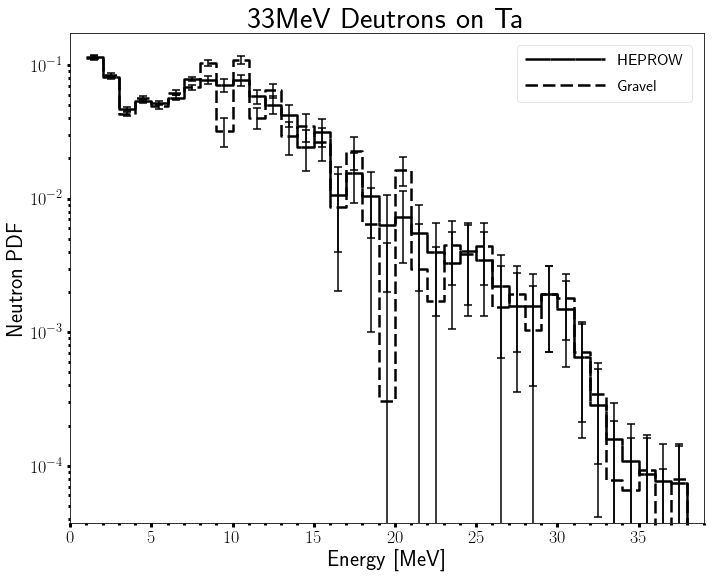

In [21]:
# Import HEPROW, UNFANA, and Gravel data and normalize
heprowData = readGru(heprowPath+heprowName, delim_whitespace=True, names=[heprowBinBounds, 'absFlux', 'absSigma'],
               skiprows=3)
heprowData['absCovSigma'] = readMTX(heprowPath+mtxName).tolist()
heprowData['normFlux'] = np.asarray(bin_differentiation(heprowData[heprowBinBounds].tolist(), 
                                            heprowData['absFlux'].tolist(), heprowBinBounds)) \
                                            / norm.currentIntegrator / norm.solidAngle \
                                            / (1-norm.deadTime)
heprowData['normSigma'] = np.asarray(bin_differentiation(heprowData[heprowBinBounds].tolist(), 
                                            heprowData['absCovSigma'].tolist(), heprowBinBounds)) \
                                            / norm.currentIntegrator / norm.solidAngle \
                                            / (1-norm.deadTime)
        
unfData = readGru(heprowPath+unfanaName, delim_whitespace=True, 
                  names=[heprowBinBounds, 'absFlux', 'absSigma'], skiprows=3)
unfData['absCovSigma'] = readMTX(heprowPath+mtxName).tolist()
unfData['normFlux'] = np.asarray(bin_differentiation(unfData[heprowBinBounds].tolist(), 
                                            unfData['absFlux'].tolist(), heprowBinBounds)) \
                                            / norm.currentIntegrator / norm.solidAngle \
                                            / (1-norm.deadTime)
unfData['normSigma'] = np.asarray(bin_differentiation(unfData[heprowBinBounds].tolist(), 
                                            unfData['absCovSigma'].tolist(), heprowBinBounds)) \
                                            / norm.currentIntegrator / norm.solidAngle \
                                            / (1-norm.deadTime)    
        
grvData = readFlu(heprowPath+gravelName, delim_whitespace=True, 
                  names=[heprowBinBounds, 'absFlux', 'absSigma'], skiprows=3)
grvData['absCovSigma'] = readMTX(heprowPath+mtxName).tolist()
grvData['normFlux'] = np.asarray(bin_differentiation(grvData[heprowBinBounds].tolist(), 
                                            grvData['absFlux'].tolist(), heprowBinBounds)) \
                                            / norm.currentIntegrator / norm.solidAngle \
                                            / (1-norm.deadTime)
grvData['normSigma'] = np.asarray(bin_differentiation(grvData[heprowBinBounds].tolist(), 
                                            grvData['absCovSigma'].tolist(), heprowBinBounds)) \
                                            / norm.currentIntegrator / norm.solidAngle \
                                            / (1-norm.deadTime)

# Calculate the pdf and its uncertainty
heprowData['pdfFlux'] = normAUBC(heprowData['absFlux'])
heprowData['pdfSigma'] = heprowData['absSigma']/heprowData['absFlux']*heprowData['pdfFlux']
heprowData['pdfCovSigma'] = heprowData['absCovSigma']/heprowData['absFlux']*heprowData['pdfFlux']

unfData['pdfFlux'] = normAUBC(unfData['absFlux'])
unfData['pdfSigma'] = unfData['absSigma']/unfData['absFlux']*unfData['pdfFlux']
unfData['pdfCovSigma'] = unfData['absCovSigma']/unfData['absFlux']*unfData['pdfFlux']

grvData['pdfFlux'] = normAUBC(grvData['absFlux'])
grvData['pdfSigma'] = grvData['absSigma']/grvData['absFlux']*grvData['pdfFlux']
grvData['pdfCovSigma'] = grvData['absCovSigma']/grvData['absFlux']*grvData['pdfFlux']

# Build pdf histogram object
heprowHisto = Histogram()
heprowHisto.build_histo(heprowData[heprowBinBounds].tolist(), heprowData['pdfFlux'].tolist(),
                       uncert=heprowData['pdfCovSigma'].tolist(), edgeLoc=heprowBinBounds,
                       name='HEPROW')
unfHisto = Histogram()
unfHisto.build_histo(unfData[heprowBinBounds].tolist(), unfData['pdfFlux'].tolist(),
                       uncert=unfData['pdfCovSigma'].tolist(), edgeLoc=heprowBinBounds,
                       name='UNFANA')
grvHisto = Histogram()
grvHisto.build_histo(grvData[heprowBinBounds].tolist(), grvData['pdfFlux'].tolist(),
                       uncert=grvData['pdfCovSigma'].tolist(), edgeLoc=heprowBinBounds,
                       name='Gravel')
heprowHisto.plot(grvHisto,logY=True, title='33MeV Deutrons on Ta', xLabel='Energy [MeV]',
                 yLabel='Neutron PDF')
heprowHisto.write(outPath+'Det0_HEPROW_1_pdf', includeUncert=True, edge=False)

# Build norm histogram object
heprowNormHisto = Histogram()
heprowNormHisto.build_histo(heprowData[heprowBinBounds].tolist(), heprowData['normFlux'].tolist(),
                       uncert=heprowData['normSigma'].tolist(), edgeLoc=heprowBinBounds,
                       name='HEPROW')
heprowNormHisto.write(outPath+'Det0_HEPROW_1_norm', includeUncert=True, edge=False)

# Build error histogram objects
heprowErrorHisto = Histogram()
heprowErrorHisto.build_histo(heprowData[heprowBinBounds].tolist(),
                               heprowData['pdfSigma']/heprowData['pdfFlux'].tolist(),
                               edgeLoc=heprowBinBounds, name='HEPROW Errors')
heprowCovErrorHisto = Histogram()
heprowCovErrorHisto.build_histo(heprowData[heprowBinBounds].tolist(),
                               heprowData['pdfCovSigma']/heprowData['pdfFlux'].tolist(),
                               edgeLoc=heprowBinBounds, name='HEPROW Covariance Errors')

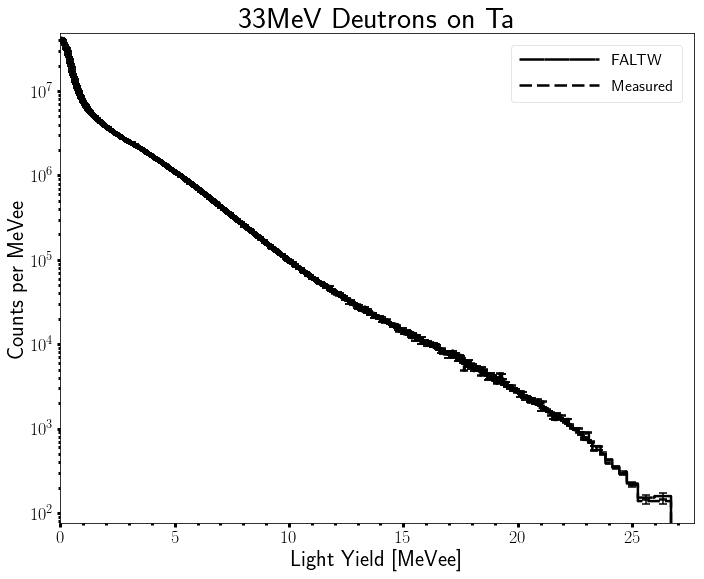

In [22]:
# Import PHS data and plot
faltwPHSData = readFlu(heprowPath+faltwPHSName, delim_whitespace=True, names=['lowE', 'absPHS', 'absSigma'],
               skiprows=3)
measPHSData = readFlu(heprowPath+measPHSName, delim_whitespace=True, names=['lowE', 'absPHS', 'absSigma'],
               skiprows=3)
faltwPHSHisto = Histogram()
faltwPHSHisto.build_histo(faltwPHSData['lowE'].tolist(), 
                         bin_differentiation(faltwPHSData['lowE'].tolist(),
                                             faltwPHSData['absPHS'].tolist()),
                       uncert=faltwPHSData['absSigma'].tolist(), edgeLoc=heprowBinBounds,
                       name='FALTW')
measPHSHisto = Histogram()
measPHSHisto.build_histo(measPHSData['lowE'].tolist(), 
                         bin_differentiation(measPHSData['lowE'].tolist(),
                                             measPHSData['absPHS'].tolist()),
                         uncert=measPHSData['absSigma'].tolist(), edgeLoc=heprowBinBounds,
                         name='Measured')
faltwPHSHisto.plot(measPHSHisto, logY=True, title='33MeV Deutrons on Ta', xLabel='Light Yield [MeVee]',
                 yLabel='Counts per MeVee')

#### Read in and Manipulate Meulders Data

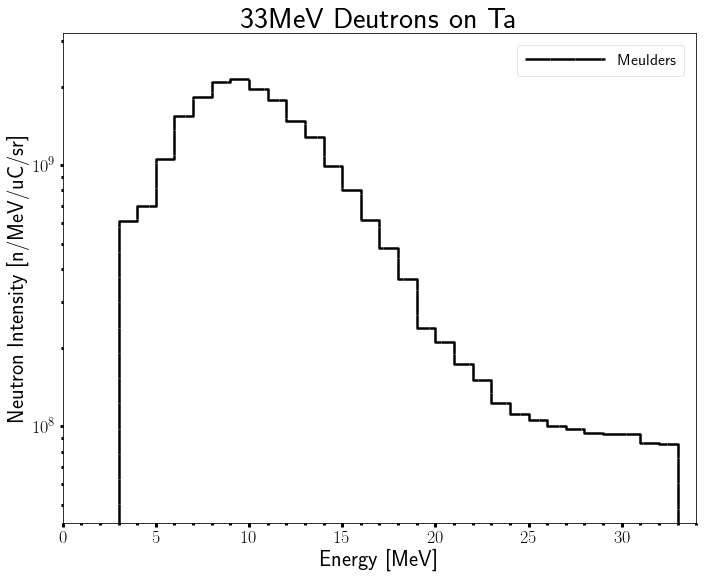

In [23]:
# Read in Meulders data and normalize
meuldersData = pd.read_table(meuldersPath+meuldersName, delim_whitespace=True, 
                             names=['upE', 'absFlux'])
meuldersData['absFlux'] = bin_differentiation(meuldersData['upE'],meuldersData['absFlux'],
                                             edgeLoc=meuldersBinBounds)
meuldersData['pdfFlux'] = normAUBC(meuldersData['absFlux'])

# Build pdf histogram object
meuldersHisto=Histogram()
meuldersHisto.build_histo(meuldersData['upE'].tolist(), meuldersData['pdfFlux'].tolist(), 
                         edgeLoc=meuldersBinBounds, name='Meulders')

# Build norm histogram object
meuldersNormHisto=Histogram()
meuldersNormHisto.build_histo(meuldersData['upE'].tolist(), meuldersData['absFlux'].tolist(), 
                         edgeLoc=meuldersBinBounds, name='Meulders')
meuldersNormHisto.plot(logY=True, title='33MeV Deutrons on Ta', xLabel='Energy [MeV]',
                 yLabel='Neutron Intensity [n/MeV/uC/sr]')

#### Read in and Manipulate MCNP Data

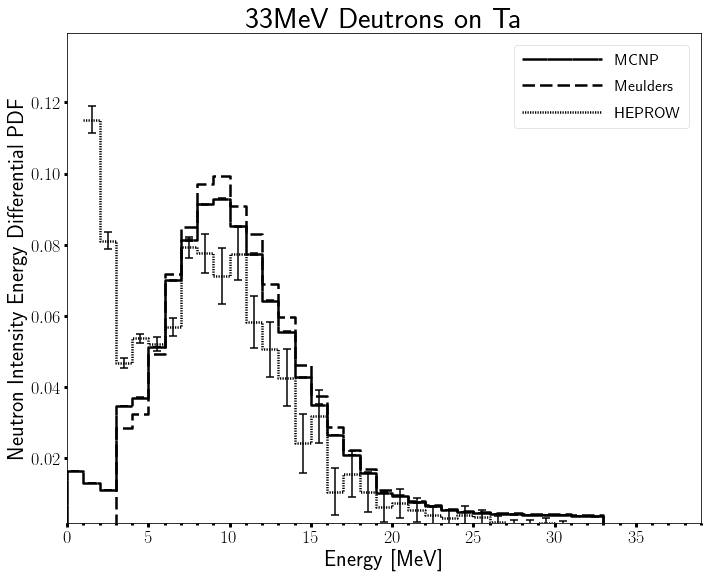

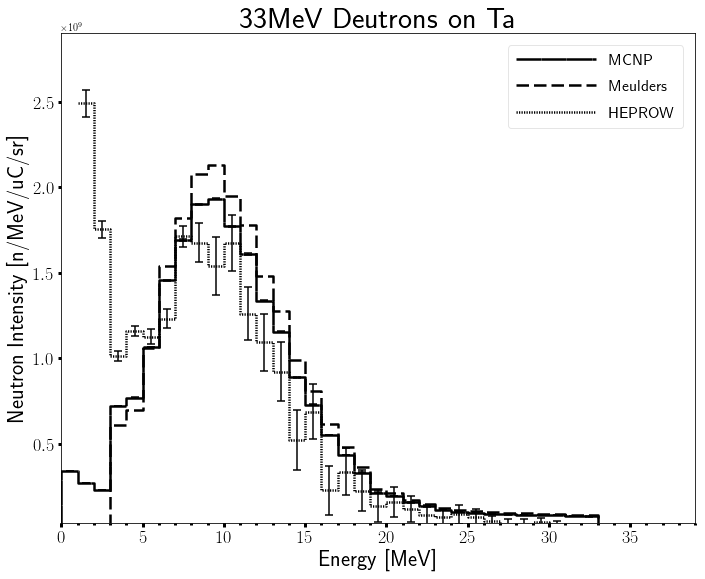

In [29]:
# Read in MCNP Simulated data
mcnpData = read_tally(mcnpPath+mcnpName,31, readGroups=True, splitTally=True)[1][1]
mcnpData.columns = [mcnpBinBounds, 'absFlux', 'relSigma']
mcnpData['absSigma'] = mcnpData['relSigma'] * mcnpData['absFlux']

tmpData1 = read_tally(mcnpPath+mcnpName,131, readGroups=True, splitTally=True)[0][1]

mcnpData['absFlux'] = mcnpData['absFlux'] + tmpData1['tally']
mcnpData['absSigma'] = np.sqrt(mcnpData['absSigma']**2 \
                                + (tmpData1['tally']*tmpData1['uncertainty'])**2)
mcnpData['relSigma'] = mcnpData['absSigma']/mcnpData['absFlux']

# Normalize the spectrum
mcnpData['normFlux'] = np.asarray(bin_differentiation(mcnpData[mcnpBinBounds].tolist(), 
                                 mcnpData['absFlux'].tolist(), mcnpBinBounds)) \
                                 * norm.mcnpNormFactor / norm.solidAngle \
                                 / norm.currentIntegrator/ (1-norm.deadTime)
mcnpData['normSigma'] = mcnpData['relSigma']*mcnpData['normFlux']
        
# Calculate the pdf and its uncertainty
mcnpData['pdfFlux'] = np.asarray(bin_differentiation(mcnpData[mcnpBinBounds].tolist(), 
                                  normAUBC(mcnpData['absFlux']).tolist(), mcnpBinBounds)) 
mcnpData['pdfSigma'] = mcnpData['relSigma']*mcnpData['pdfFlux']

# Build pdf histogram object
mcnpHisto=Histogram()
mcnpHisto.build_histo(mcnpData[mcnpBinBounds].tolist(), mcnpData['pdfFlux'].tolist(), 
                      uncert=mcnpData['pdfSigma'].tolist(), edgeLoc=mcnpBinBounds, name='MCNP')
mcnpHisto.plot(meuldersHisto, heprowHisto, heplogY=False, title='33MeV Deutrons on Ta',
                   xLabel='Energy [MeV]', yLabel='Neutron Intensity Energy Differential PDF', 
                   savePath=outPath+'33MeVTa_MCNP_pdf_lin_1_zoom')

# Build norm histogram object
mcnpNormHisto=Histogram()
mcnpNormHisto.build_histo(mcnpData[mcnpBinBounds].tolist(), mcnpData['normFlux'].tolist(), 
                          uncert=mcnpData['normSigma'].tolist(),edgeLoc=mcnpBinBounds,
                          name='MCNP')
mcnpNormHisto.plot(meuldersNormHisto, heprowNormHisto, heplogY=False, title='33MeV Deutrons on Ta',
                   xLabel='Energy [MeV]', yLabel='Neutron Intensity [n/MeV/uC/sr]', 
                   savePath=outPath+'33MeVTa_MCNP_norm_lin_1')

#### Plot

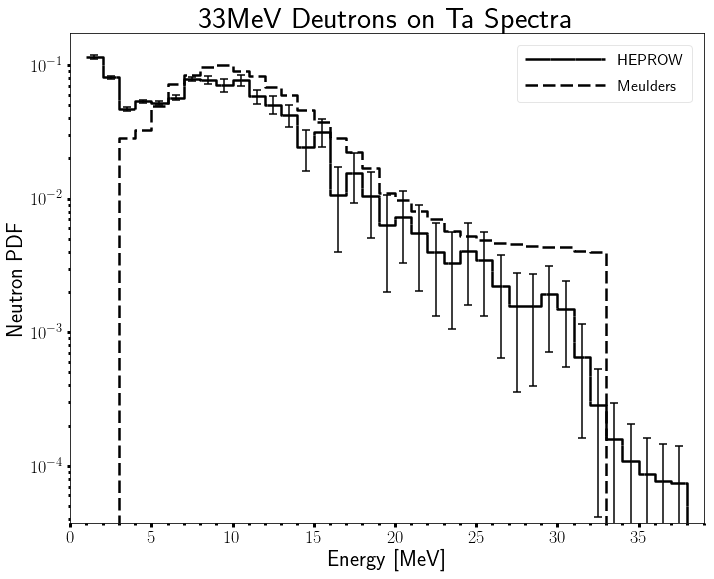

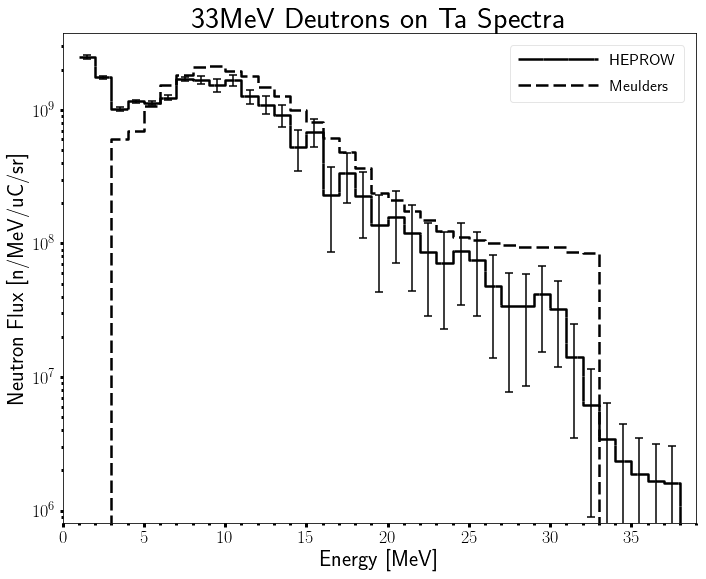

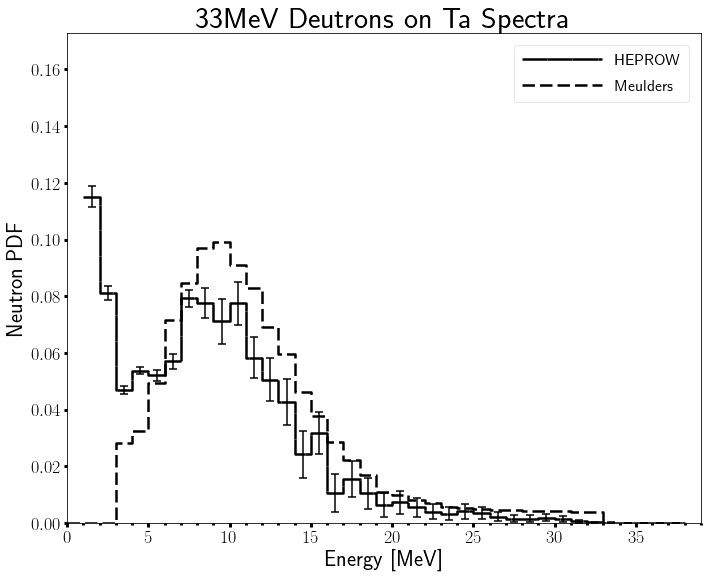

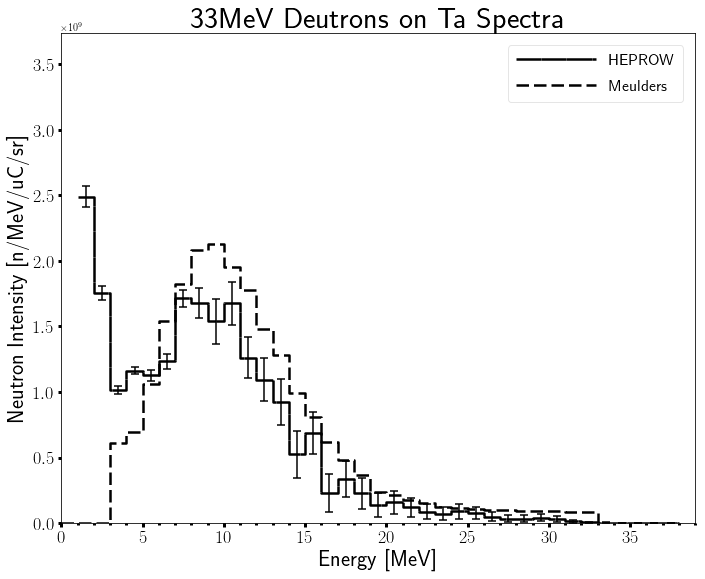

In [17]:
# Log
heprowHisto.plot(meuldersHisto, logY=True, title='33MeV Deutrons on Ta Spectra',
                 xLabel='Energy [MeV]', yLabel='Neutron PDF',
                 savePath=outPath+'33MeVTa_pdf_log_1')
heprowNormHisto.plot(meuldersNormHisto, logY=True, title='33MeV Deutrons on Ta Spectra',
                 xLabel='Energy [MeV]', yLabel='Neutron Flux [n/MeV/uC/sr]',
                 savePath=outPath+'33MeVTa_norm_log_1')
#heprowCovErrorHisto.plot(heprowErrorHisto, nsdErrorHisto, logY=True, 
#                         title='16MeV Deutrons on Ta Spectra Errors',
#                         xLabel='Energy [MeV]', yLabel='Relative Error')

# Linear
heprowHisto.plot(meuldersHisto, title='33MeV Deutrons on Ta Spectra',
                 xLabel='Energy [MeV]', yLabel='Neutron PDF',
                 savePath=outPath+'33MeVTa_pdf_lin_1')
heprowNormHisto.plot(meuldersNormHisto, title='33MeV Deutrons on Ta Spectra',
                 xLabel='Energy [MeV]', yLabel='Neutron Intensity [n/MeV/uC/sr]',
                 savePath=outPath+'33MeVTa_norm_lin_1')

# ToDos

- Tail/Total vs Tail/Peak? <br\>
- Cut non-proton events from response matrix? <br\>
- Fitted PSD discrepancy? Then PSD cut all data sets
- 0.5 MeV Response Matrix
- 0.5 MeV Unfold
- Rerun simulations with new sources (from Isaac)
- Determine appropriate source (measured?)
- Contribution of neutrons outside of direct line to solution?
- Linear extrapolation at high E?
- Create Layered simulations
- Add Chi**2 (to plot?)